In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
vet_suicides = pd.read_csv('2011.csv')

vet_suicides.drop(columns='Unnamed: 0', inplace=True)
vet_suicides = vet_suicides.rename(columns={
    'state': 'State', 
    'vet_pop': 'Vet Population',
    'overall_pop_18': 'Overall Population',
    'vet_pop_p': 'Vet Population',
    'vet_suicides': 'Vet Suicides',
    'all_suicides': 'All Suicides',
    'vet_males': 'Vet Males',
    'vet_females': 'Vet Females',
    'vet_rate': 'Vet Rate',
    'civ_rate': 'Civilian Rate'
})

vet_suicides.head()

,State,Vet Population,Overall Population,Vet Population,Vet Suicides,All Suicides,vet_suicides_p,Vet Males,vet_males_p,Vet Females,...,vet_40_49,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,Vet Rate,Civilian Rate
0,Alabama,395753,3662910,0.108043,163,680,0.239706,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.187306,15.824155
1,Alaska,72407,517799,0.139836,27,142,0.190141,24.0,0.888889,3.0,...,NaN,NaN,4.0,NaN,NaN,5.0,NaN,6.0,37.289212,25.819952
2,Arizona,533608,4842927,0.110183,242,1091,0.221815,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.351644,19.701489
3,Arkansas,238790,2221409,0.107495,89,447,0.199105,89.0,1.000000,0.0,...,NaN,31.0,NaN,NaN,NaN,14.0,NaN,33.0,37.271243,18.056924
4,California,1910994,28292703,0.067544,706,3923,0.179964,679.0,0.961756,27.0,...,NaN,NaN,NaN,NaN,250.0,NaN,NaN,356.0,36.944124,12.194055


In [87]:
total_suicides = vet_suicides.groupby('State')['Vet Suicides'].sum().sort_values(ascending=False)

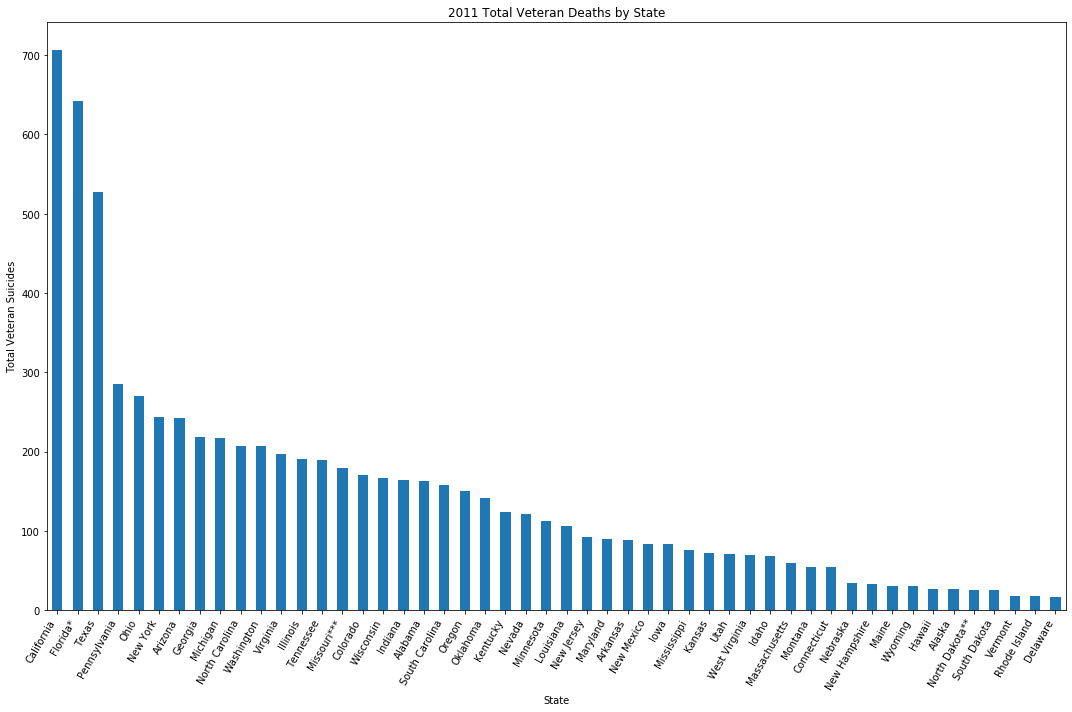

In [88]:
ax = total_suicides.plot.bar()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15


ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
ax.set_title('2011 Total Veteran Deaths by State')

plt.ylabel('Total Veteran Suicides')
plt.tight_layout()

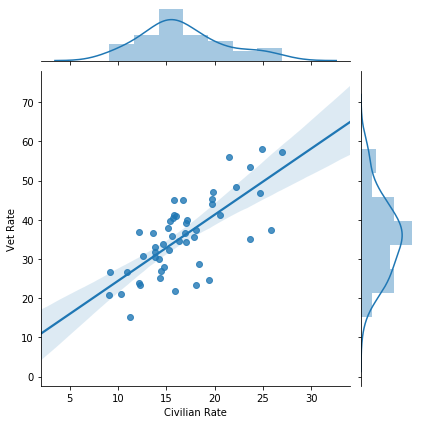

In [98]:
sns.jointplot(x='Civilian Rate', y='Vet Rate', data=vet_suicides, kind='reg')